In [6]:
import numpy as np
import pandas as pd
import ast

import matplotlib.pyplot as plt

In [7]:
raw_path = r"F:\Research\TropicalForestEdge\NIRv_ano_TMF_edges_3.csv"
raw_df = pd.read_csv(raw_path)
raw_df

,system:index,-1,10080,10200,10320,10440,10560,10680,1080,10800,...,9600,9720,9840,9960,Continent,GEZcode,Id,Tot,anoMCWD,.geo
0,00000000000000000038,"[4797081, 0.1644650117181369, 2.2926758605695152]","[44728, 0.5410405656007664, 3.8074374319776436]","[44457, 0.5232048781432539, 3.8035340990105295]","[44150, 0.49862287853718346, 3.869120288356657]","[44107, 0.5842647943123228, 3.7680449916906356]","[43999, 0.6317647536214415, 3.7640922789702804]","[43956, 0.6107565438236189, 3.7351895114297555]","[98215, 0.5329827144776654, 2.409424972481117]","[42629, 0.622503887136252, 3.7519932541569463]",...,"[52120, 0.6017666891684278, 3.8546981132050395]","[50321, 0.6156740693468559, 3.8700482401700715]","[46779, 0.5924521741696633, 3.8035763328305436]","[46437, 0.5879762910163077, 3.8875115806510836]",Americas,11.0,160,597546.0,"[-0.8810792454902168, 0.40460581781529537]","{""type"":""Polygon"",""coordinates"":[[[-74.7201843..."
1,00000000000000000043,"[5713933, -0.7828709717276682, 2.2720719675018...","[51914, -1.551257969753665, 4.058351400668705]","[49712, -1.586872778895532, 3.9758736303338735]","[30790, -0.7770431003719825, 2.2616680887662644]","[46654, -1.4457564548577473, 4.13802778258224]","[44466, -1.4042636287906296, 4.1376145963212805]","[42707, -1.5565389599885315, 4.004596590793066]","[248357, -1.4230230460753206, 3.6306207287631382]","[41797, -1.5499928691945082, 4.093569923879524]",...,"[57933, -1.5530645436174992, 3.674169241219573]","[58177, -1.56351685974545, 3.9539887331445]","[57288, -1.5804774431180133, 4.053992031940689]","[53695, -1.6132146072355213, 3.967793382521245]",Americas,11.0,179,214252.0,"[-1.3117610266112143, 0.41990775664545094]","{""type"":""Polygon"",""coordinates"":[[[-73.4211456..."
2,000000000000000000b4,"[6713578, -1.039112353118424, 4.521556460846133]","[35514, -0.25717465816462104, 4.284080076129336]","[34547, -0.09399255830675228, 4.423230725426701]","[33068, -0.11559323967972132, 4.3672474180450385]","[31944, 0.12563792268946805, 4.269781874464667]","[30776, 0.1839226049128781, 4.237991883514795]","[29630, 0.06852811793346078, 4.165668563239295]","[406423, -2.1653631825742443, 4.801517082276879]","[28954, 0.2365208170430886, 4.240294831250107]",...,"[42608, -0.3284679121323842, 4.271204884616253]","[40284, -0.2843553683094352, 4.263766635960923]","[38913, -0.2853698228949658, 4.2626070242177905]","[37788, -0.2793182729567834, 4.25728794966836]",Americas,11.0,340,174593.0,"[-1.6354158446963245, 0.36416437847417676]","{""type"":""Polygon"",""coordinates"":[[[-63.0288404..."
3,000000000000000000a3,"[4417871, -0.11268127992336084, 2.755873049337...","[56550, -0.5120325788885666, 4.930997587770729]","[55978, -0.5107474976541868, 4.942855517320279]","[54887, -0.4697348155134608, 4.962039448989628]","[53912, -0.38844397020299787, 4.866215426701187]","[52846, -0.411089077270092, 5.016710617973681]","[51252, -0.4339087507882146, 4.92127531581749]","[50157, 0.09693379676622409, 2.409419709505929]","[49501, -0.3264157484302512, 4.897598731041693]",...,"[61380, -0.5103073043618979, 4.871364624426709]","[59555, -0.522925772702486, 4.890830657134703]","[58988, -0.6346174984458606, 5.022406822789807]","[57246, -0.5552913370923457, 4.929940641710837]",Americas,11.0,317,261767.0,"[-2.164150462540181, 0.3797060951576657]","{""type"":""Polygon"",""coordinates"":[[[-64.3278791..."


In [10]:
outdf_columns = ['Id', 'system:index', 'Continent', 'GEZcode', 'Tot', '.geo']
other_columns = ['anoMCWD']
dist_columns = list(set(outdf_columns) ^ set(raw_df.columns)^ set(other_columns))

# Reshape csv.
outdf = pd.DataFrame(columns=outdf_columns+['aveAnoMCWD', 'stdAnoMCWD','Dist', 'Mean', 'Std'])
for row_num in range(len(raw_df)):
    row = raw_df.iloc[row_num,:]
    row_df = pd.DataFrame(columns=outdf_columns+['Dist', 'Mean', 'Std'])
    row_df['Dist'] = [int(x) for x in dist_columns]
    row_df['Count'] = [ast.literal_eval(row[x].replace('null', '0'))[0] for x in dist_columns]
    row_df['Mean'] = [ast.literal_eval(row[x].replace('null', '0'))[1] for x in dist_columns]
    row_df['Std'] = [ast.literal_eval(row[x].replace('null', '0'))[2] for x in dist_columns]
    row_df['aveAnoMCWD'] = ast.literal_eval(row['anoMCWD'])[0]
    row_df['stdAnoMCWD'] = ast.literal_eval(row['anoMCWD'])[1]
    row_df[outdf_columns] = row.loc[outdf_columns]
    row_df = row_df.sort_values(by='Dist')
    outdf = pd.concat([outdf, row_df], axis=0, ignore_index=True)

# out_path = r"F:\Research\TropicalForestEdge\veg_ano_dist_rebuilt.csv"
# outdf.to_csv()
outdf


C:\Users\DELL\AppData\Local\Temp\ipykernel_24088\4029697830.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row_df[outdf_columns] = row.loc[outdf_columns]
C:\Users\DELL\AppData\Local\Temp\ipykernel_24088\4029697830.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outdf = pd.concat([outdf, row_df], axis=0, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_24088\4029697830.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with 

,Id,system:index,Continent,GEZcode,Tot,.geo,aveAnoMCWD,stdAnoMCWD,Dist,Mean,Std,Count
0,160,00000000000000000038,Americas,11.0,597546.0,"{""type"":""Polygon"",""coordinates"":[[[-74.7201843...",-0.881079,0.404606,-1,0.164465,2.292676,4797081.0
1,160,00000000000000000038,Americas,11.0,597546.0,"{""type"":""Polygon"",""coordinates"":[[[-74.7201843...",-0.881079,0.404606,120,1.603134,4.843459,174784.0
2,160,00000000000000000038,Americas,11.0,597546.0,"{""type"":""Polygon"",""coordinates"":[[[-74.7201843...",-0.881079,0.404606,240,0.352503,2.688727,183819.0
3,160,00000000000000000038,Americas,11.0,597546.0,"{""type"":""Polygon"",""coordinates"":[[[-74.7201843...",-0.881079,0.404606,360,0.417350,2.562684,185376.0
4,160,00000000000000000038,Americas,11.0,597546.0,"{""type"":""Polygon"",""coordinates"":[[[-74.7201843...",-0.881079,0.404606,480,0.494921,2.515599,163104.0
...,...,...,...,...,...,...,...,...,...,...,...,...
599,317,000000000000000000a3,Americas,11.0,261767.0,"{""type"":""Polygon"",""coordinates"":[[[-64.3278791...",-2.164150,0.379706,17520,-0.205952,4.907830,3909.0
600,317,000000000000000000a3,Americas,11.0,261767.0,"{""type"":""Polygon"",""coordinates"":[[[-64.3278791...",-2.164150,0.379706,17640,-0.119097,5.010865,3788.0
601,317,000000000000000000a3,Americas,11.0,261767.0,"{""type"":""Polygon"",""coordinates"":[[[-64.3278791...",-2.164150,0.379706,17760,-0.342770,5.077132,3654.0
602,317,000000000000000000a3,Americas,11.0,261767.0,"{""type"":""Polygon"",""coordinates"":[[[-64.3278791...",-2.164150,0.379706,17880,-0.251961,5.333062,3602.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_24088\2243389826.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dst_df[outdf['Dist']!=-1].plot(x='Dist', y='Mean', yerr='Std', label='Edge Forest')


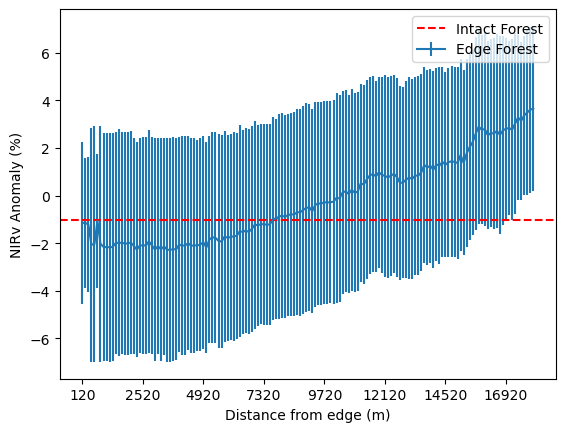

In [11]:
dst_df = outdf[outdf['Id']==340]
dst_df[outdf['Dist']!=-1].plot(x='Dist', y='Mean', yerr='Std', label='Edge Forest')
plt.axhline(y=dst_df.loc[outdf['Dist']==-1, 'Mean'].values[0], color='red', linestyle='--', label='Intact Forest')

# plt.xlim(120, 200)
plt.ylabel('NIRv Anomaly (%)')
plt.xlabel('Distance from edge (m)')
plt.legend()

C:\Users\DELL\AppData\Local\Temp\ipykernel_2476\1893763347.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dst_df[outdf['Dist']!=-1].plot(x='Dist', y='Count')


<Axes: xlabel='Dist'>

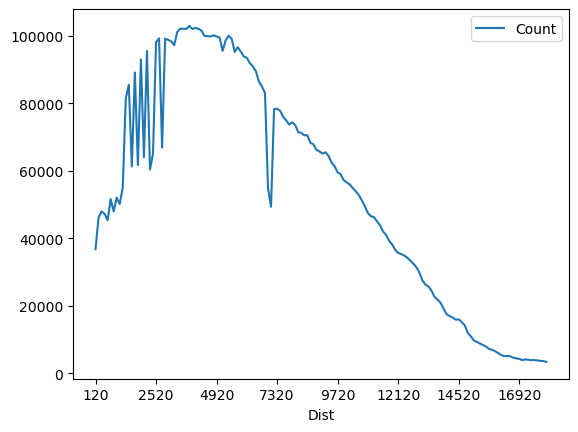

In [15]:
dst_df[outdf['Dist']!=-1].plot(x='Dist', y='Count')

In [16]:
from scipy.stats import f

# 自由度
dfn = 1  # 分子自由度（组间自由度）
dfd = dst_df.loc[dst_df['Dist'].isin([-1, 120, 240, 360]), 'Count'].sum() # 分母自由度（组内自由度）
print(dfd)
# 显著性水平（alpha）
alpha = 0.05

# 计算F阈值
f_threshold = f.ppf(1 - alpha, dfn, dfd)
print("F阈值:", f_threshold)

8066089.0
F阈值: 3.8414599726636545
